<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.seepsa.com.mx/galeria/photo/Tanques-Mezcladores/00-tanque-mezclador.jpg" width="150px" height="150px" />


# Manejo de ecuaciones de balance en Python
> En este reporte detallamos como Python puede ser utilizado para modelar la respuesta dinamica de un tanque en donde se realiza una mezcla, considerando variables tales como el volumen, la concentracion, y temperatura, por medio de una serie de balances de masa, especie, y energia.

### Objetivos.
> #### 1.1 Objetivo general.
>  - Entender cómo funciona un tanque mezclador
>  - Obtener una serie de gráficas que muestren el comportamiento a través del tiempo de un tanque mezclado
> #### 1.2 Objetivos específicos
>  - Modelar el sistema por medio de las ecuaciones diferenciales que lo describen
>  - Aplicar las herramientas de Python para resolver ecuaciones diferenciales
>  - Realizar las imágenes que muestran la respuesta a través del tiempo

### Modelo que representa el problema.

Cuando se desea realizar una mezcla en un tanque, al cual le está entrando cierto componente, y se mezcla con otro componente, se deben analizar ciertos componentes como lo son la cantidad de materia que entra y sale (masa), la concentración del cierto componente que se quiere mezclar (especies), las fuerzas en el sistema (momento), y la temperatura (energia).

Específicamente, se tiene el siguiente problema:

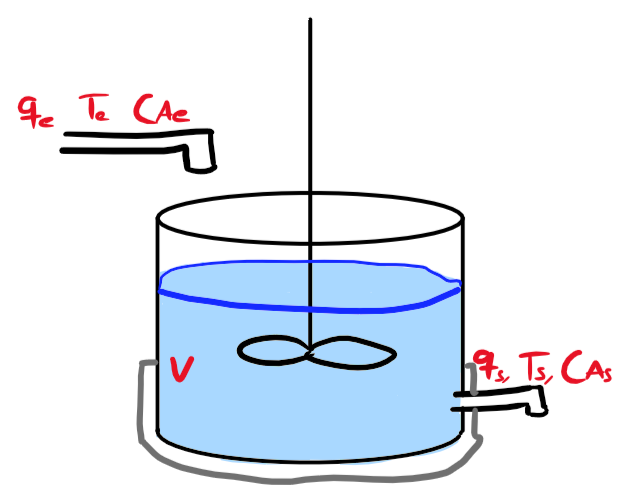

Se tiene un tanque en el cual se está mezclando un líquido entrante con un líquido presente en el tanque. La temperatura puede ser ajustada debido a que el tanque tiene un intercambiador de calor en sus paredes (gris en el diagrama).

Los parámetros de entrada del tanque son:
$$q_e: \textrm{flujo volumetrico de la entrada } [l/min]$$
$$T_e: \textrm{Temperatura del líquido entrante } [K]$$
$$C_{Ae}: \textrm{Concentración de una sustancia en líquido entrante } [mol/L]$$

El liquido en el tanque inicialmente está a:
$$q_s: \textrm{flujo volumetrico de la salida } [l/min]$$
$$T_s: \textrm{Temperatura del líquido a la salida } [K]$$
$$C_{As}: \textrm{Concentración de una sustancia en la salida } [mol/L]$$

El volumen inicial del liquido es $V_i=1[l]$. La concentración inicial de la sustancias es $C_{Ai}=0.0 [mol/L]$, y la temperatura inicial es de $T_i=350 [K]$

Las ecuaciones que describen el comportamiento son:

#### Balance de Masa

Expresado como el cambio de la masa (densidad por volumen) respecto al tiempo, lo cual es la suma de las entradas menos las salidas.
$$\frac{dm}{dt} = \frac{d(\rho\,V)}{dt} = \sum \dot m_{in} - \sum \dot m_{out}$$

#### Balance de Especies

Normalmente escrita como la acumulacion de n moleculas en un volumen de control A. Es la suma de las entradas menos las salidas, mas lo generado menos lo consumido.
$$\frac{dn_A}{dt} = \sum \dot n_{A_{in}} - \sum \dot n_{A_{out}} + \sum \dot n_{A_{gen}} - \sum \dot n_{A_{cons}}$$

Tambien puede ser expresado como una concentracion cA, y los terminos generados y consumidos se expresan como una tasa de reaccion rA, que significa la tasa de generacion molar por volumen.
$$\frac{dc_A V}{dt} = \sum c_{A_{in}} \dot V_{in} - \sum c_{A_{out}} \dot V_{out} + r_A V$$
Aplicando la regla de la cadena y teniendo en cuenta que solo hay una entrada y salida: 
$$\frac{dc_A}{dt} = \frac{q_e C_{A_e}-qC_A}{V}-rA-\frac{Ca}{V}\frac{dV}{dt}$$

#### Balance de Momento

Es la acumulacion de las fuerzas actuando en el volumen de control, donde m es la masa en el volumen de control, y v es la velocidad.
$$\frac{d(m\,v)}{dt} = \sum F$$
Aplicando la regla de la cadena y teniendo en cuenta que solo hay una entrada y salida: 
$$\frac{dT}{dt} = \frac{q_e T_e-qT}{V}-\frac{T}{V}\frac{dV}{dt}$$

#### Balance de Energia

$$\frac{dE}{dt} = \frac{d(U+K+P)}{dt} = \sum \dot m_{in} \left( \hat h_{in} + \frac{v_{in}^2}{2g_c} + \frac{z_{in} g_{in}}{g_c} \right) \\ - \sum \dot m_{out} \left( \hat h_{out} + \frac{v_{out}^2}{2g_c} + \frac{z_{out} g_{out}}{g_c} \right) + Q + W_s$$
Debido a que los terminos de energia cinetica y potencial son muy mequeños a comparación a el término de la energía interna, éstos son descartados. Entonces queda:
$$\frac{dh}{dt} = \sum \dot m_{in} \hat h_{in} - \sum \dot m_{in} \hat h_{out} + Q + W_s$$
La entalpía $h=mc_p\Delta{T}$ se sustituye y queda:
$$m\,c_p\frac{dT}{dt} = \sum \dot m_{in} c_p \left( T_{in} - T_{ref} \right) - \sum \dot m_{out} c_p \left( T_{out} - T_{ref} \right) + Q + W_s$$


### Simulaciones.

In [20]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [74]:
v0=[5, 0, 350] #Volumen inicial, concentracion inicial, temperatura inicial

Definimos la funcion tanque, que depende de qe(flujo de entrada),qs (flujo de salida), Cae(concentracion de la sustancia a la entrada), y Te (Temperatura de entrada). Tambien depende del vector de valores iniciales "v0", y del tiempo "t".

In [75]:
def tanque(v0,t,q,qe,Cae,Te):
    V=v0[0]
    Ca=v0[1]
    T=v0[2]
    rA=0
    dmdt=qe-q #balance de materia
    dCadt=(qe*Cae-q*Ca)/V-rA-(Ca*dmdt/V) #balance de especies
    dTdt=(qe*Te-q*T)/V-(T*dmdt/V) #balance de energia
    ans=[dmdt, dCadt, dTdt]
    return ans

In [76]:
t = np.linspace(0,20,100) #Analizando los tiempos de 0 a 10 min con 100 puntos de por medio

In [82]:
# Entradas
qe=np.ones(len(t))*5 #flujo de entrada, el vector es del mismo tamaño que el tiempo
qe[50:]=4.5 #simulando un cambio a la mitad del tiempo

q=np.ones(len(t))*4 #flujo de salida
Cae=np.ones(len(t))*1 #flujo de entrada, el vector es del mismo tamaño que el tiempo
Cae[50:]=0.3 #simulando un cambio de concentracion
Te=np.ones(len(t))*300 #temperatura del fluido de entrada
Te[50:]=350 #simulando un cambio de temperatura

#Valores iniciales (seran reescritos despues)
V=np.ones(len(t))*v0[0]
Ca=np.ones(len(t))*v0[1]
T=np.ones(len(t))*v0[2]

In [83]:
#simulacion y resultado de las ecuaciones diferenciales
for i in range(len(t)-1):
    inputs=(q[i], qe[i], Cae[i], Te[i])
    time_step=[t[i], t[i+1]]
    v=odeint(tanque, v0, time_step, args=inputs)
    V[i+1]=v[-1][0]
    Ca[i+1]=v[-1][1]
    T[i+1]=v[-1][2]
    v0 = v[-1] #nuevos valores iniciales

### Visualización de resultados de simulación.
> Se deben mostrar gráficas que ilustren de forma adecuada los resultados de simulación. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar).

Text(0.5, 0, 'Tiempo (min)')

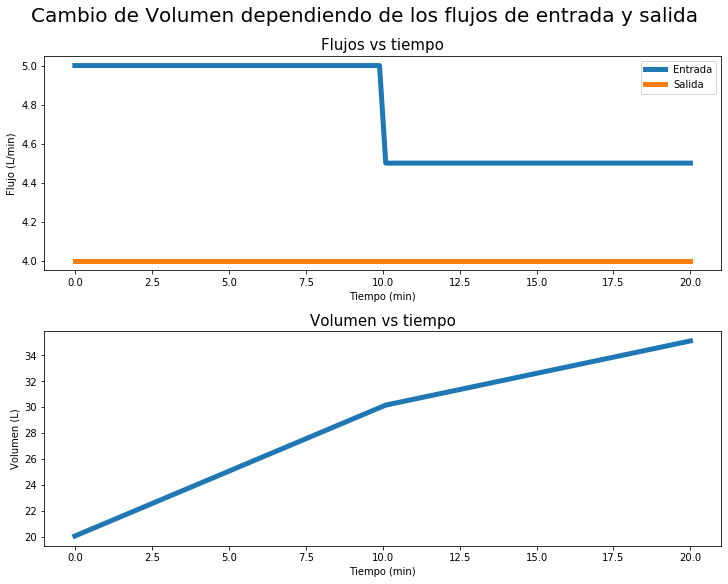

In [104]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(10,8))
fig.suptitle('Cambio de Volumen dependiendo de los flujos de entrada y salida', fontsize=20)

ax[0].set_title('Flujos vs tiempo', fontsize=15)
ax[0].plot(t,qe,label='Entrada', linewidth=5)
ax[0].plot(t,q, label='Salida', linewidth=5)
ax[0].set_ylabel('Flujo (L/min)')
ax[0].set_xlabel('Tiempo (min)')
ax[0].legend(loc='best')

ax[1].set_title('Volumen vs tiempo', fontsize=15)
ax[1].plot(t,V, linewidth=5)
ax[1].set_ylabel('Volumen (L)')
ax[1].set_xlabel('Tiempo (min)')

Text(0.5, 0, 'Tiempo (min)')

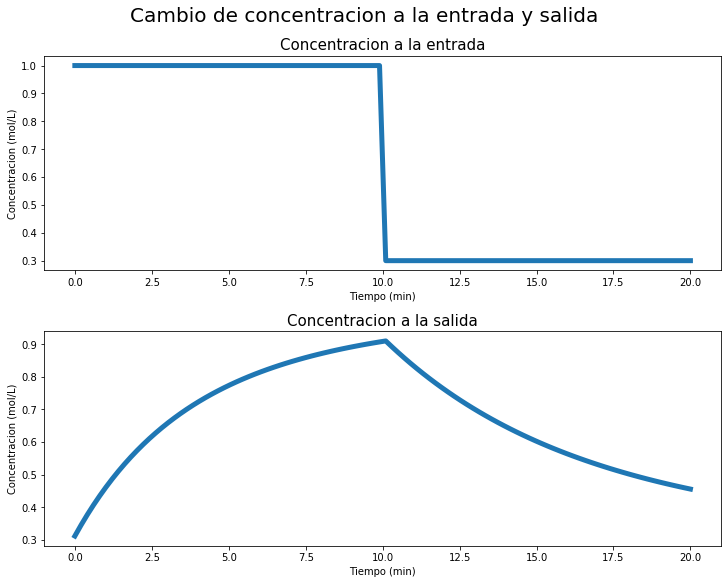

In [107]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(10,8))
fig.suptitle('Cambio de concentracion a la entrada y salida', fontsize=20)

ax[0].set_title('Concentracion a la entrada', fontsize=15)
ax[0].plot(t,Cae, linewidth=5)
ax[0].set_ylabel('Concentracion (mol/L)')
ax[0].set_xlabel('Tiempo (min)')

ax[1].set_title('Concentracion a la salida', fontsize=15)
ax[1].plot(t,Ca, linewidth=5)
ax[1].set_ylabel('Concentracion (mol/L)')
ax[1].set_xlabel('Tiempo (min)')

Text(0.5, 0, 'Tiempo (min)')

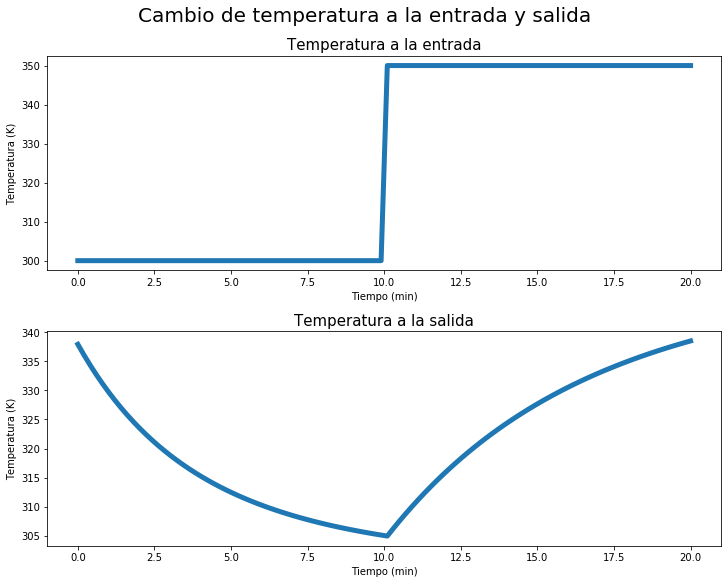

In [108]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(10,8))
fig.suptitle('Cambio de temperatura a la entrada y salida', fontsize=20)

ax[0].set_title('Temperatura a la entrada', fontsize=15)
ax[0].plot(t,Te, linewidth=5)
ax[0].set_ylabel('Temperatura (K)')
ax[0].set_xlabel('Tiempo (min)')

ax[1].set_title('Temperatura a la salida', fontsize=15)
ax[1].plot(t,T, linewidth=5)
ax[1].set_ylabel('Temperatura (K)')
ax[1].set_xlabel('Tiempo (min)')

### Conclusiones.
En este reporte primordialmente cumplimos los objeticos de entender como funciona un tanque mezclador, así como su modelo matemático que lo representa. También logramos graficar la respuesta transitoria, viendo como cambia la salida, respecto a unos valores iniciales y a un cambio a la entrada.

Aplicamos las herramientas de Python para resovler ecuaciones diferenciales, y reforzamos el aprendizaje realizado en clase.

### Referencias.
- http://www.sharetechnote.com/html/DE_Modeling_Example_Mixing.html
- https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html